### Logistic Regression

#### Introduction

* Logistic Regression is one of the basic and popular algorithm to solve a classification problem. 
* It is named as ‘Logistic Regression’, because it’s underlying technique is quite the same as Linear Regression. 
* The term “Logistic” is taken from the Logit function that is used in this method of classification.
* Logistic Regression is used when the dependent variable(target) is categorical (you need to encode the categorical variable into a numeric value)
* For multi class problems you can use Multinomial Logistic Regression

#### Why not use Linear Regression?

Consider an example of where we have data of tumor size vs its malignancy. As it is a classification problem that either a patient is maligant or not. If we plot, we can see, all the values will lie on 0 and 1. And if we fit best found regression line, by assuming the threshold at 0.5, the graph might look like below

<img src='images/logit1.png' alt='logit1' style="width: 500px;"/>

We can decide the point on the x axis from where all the values lie to its left side are considered as negative class and all the values lie to its right side are positive class.

<img src='images/logit2.jpeg' alt='logit2' style="width: 500px;"/>

But what if there is an outlier in the data. Things would get pretty messy. For example, for 0.5 threshold.

<img src='images/logit3.png' alt='logit3' style="width: 500px;"/>

If we fit best found regression line, it still won’t be enough to decide any point by which we can differentiate classes. It will put some positive class examples into negative class. The green dotted line (Decision Boundary) is dividing malignant tumors from benign tumors but the line should have been at a yellow line which is clearly dividing the positive and negative examples. So just a single outlier is disturbing the whole linear regression predictions. And that is where logistic regression comes into a picture.

#### Logistic Regression

As discussed earlier, to deal with outliers, Logistic Regression uses Sigmoid function.
An explanation of logistic regression can begin with an explanation of the standard logistic function. The logistic function is a Sigmoid function, which takes any real value between zero and one.

Step functions enforce some threshold on a variable e.g.: discard anything below a certain value. Given $u(x)$ any value equal to or greater than $0$ would trigger a positive output ($1$ in this case), everything else just equals zero. With $3u(x-8)$ everything equal to or greater than $8$ triggers a non-zero output ($3$ in this case).

$$u(x) \begin{cases} 0 & \mbox{if} & x < 0 \ 1 & \mbox{if} & x \geq 0 \ \end{cases}$$

Step functions are like switches. We could utilise them to trigger a signal whenever a threshold is crossed. Imagine opening the floodgates whenever the water level crosses a certain point or turning of the electric lighting when the ambient light brightness exceeds a given measure.

Perceptrons, binary classifiers and the neurons in artificial neural networks require an activation function in order to produce any output. The step function is a valid option for the activation function but poses a challenge in analysis because of the jump disconuity at $x=0$.

At $x=0$ the derivative is undefined ($\frac{\infty}{0}$) while the derivative is zero for the remainder of the domain.

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

The sigmoid function $\sigma(x)$, because of its differentiability, is sometimes used as an alternative to the step function $u(x)$.

Some may choose to introduce a weight $\beta$ to the input variables in order to obtain a sigmoid curve more reminiscent of the step we're trying to mimic. By tweaking the $\beta$ term, one can obtain a result that approaches the step function, yet remains differentiable throughout its entire domain.

$$\sigma(x) = \frac{1}{1+e^{-x\beta}}$$


<img src='images/logit4.png' alt='logit4' style="width: 500px;"/>

#### Logistic Regression on Breast Cancer Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/data.csv')
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
drop_cols = ['Unnamed: 32','id']
df = df.drop(drop_cols, axis = 1)

In [4]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
y = df.diagnosis.values
x_data = df.drop(['diagnosis'], axis=1)

In [5]:
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [6]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (30, 483)
x test:  (30, 86)
y train:  (483,)
y test:  (86,)


In [7]:
# initialize
# lets initialize parameters
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [8]:
# sigmoid
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [9]:
# forward and backward

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [10]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [11]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [12]:
# Logistic Regression
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 0.692836
Cost after iteration 10: 0.498576
Cost after iteration 20: 0.404996
Cost after iteration 30: 0.350059
Cost after iteration 40: 0.313747
Cost after iteration 50: 0.287767
Cost after iteration 60: 0.268114
Cost after iteration 70: 0.252627
Cost after iteration 80: 0.240036
Cost after iteration 90: 0.229543


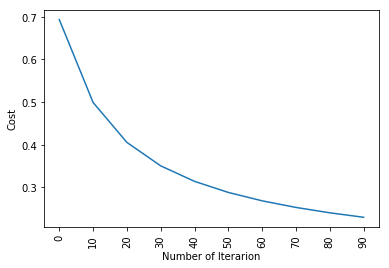

train accuracy: 94.40993788819875 %
test accuracy: 94.18604651162791 %


In [13]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 100) 

#### Using sklearn package in Python

In [15]:
# sklearn
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter= 150, solver='liblinear')
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.9651162790697675 
train accuracy: 0.9668737060041408 
